In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('./walmart-sales-dataset-of-45stores.csv', parse_dates = ['Date'])

In [10]:
df['Year']=df.Date.dt.year
df['Month']=df.Date.dt.month
df['Day']=df.Date.dt.day

In [12]:
df['WeekDay'] = df.Date.dt.weekday

In [14]:
df.WeekDay.replace({0:'Sunday', 1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}, inplace=True)

In [21]:
weekly_sales_vs_temp=df.groupby('Temperature')['Weekly_Sales'].sum().sort_values(ascending=False)

### Is there a correlation between temperature and weekly sales? Does warmer or colder weather affect sales?

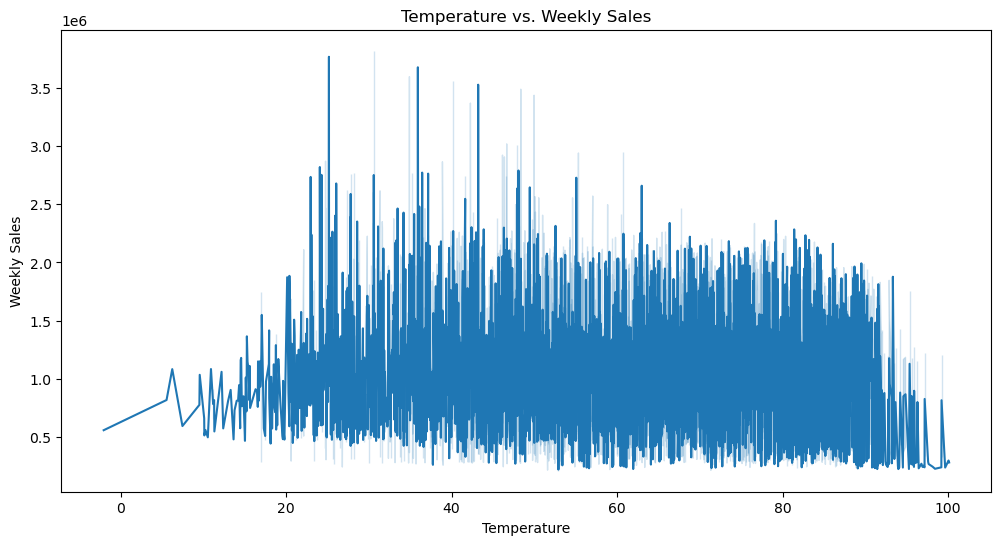

In [66]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Temperature', y='Weekly_Sales')
plt.title('Temperature vs. Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()


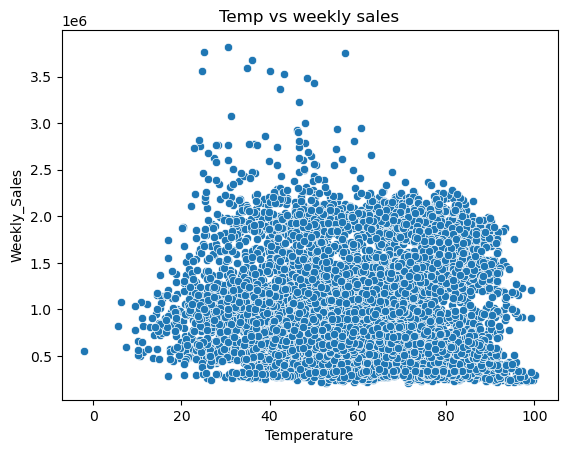

In [17]:
sns.scatterplot(data=df, x= 'Temperature', y='Weekly_Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly_Sales')
plt.title('Temp vs weekly sales')
plt.show()

In [26]:
correlation= df['Temperature'].corr(df['Weekly_Sales'])

In [27]:
correlation

-0.06381001317946962

In [30]:
temperature_bins= pd.cut(df['Temperature'], bins = 5)

In [32]:
avg_sales_by_temp=df.groupby(temperature_bins)['Weekly_Sales'].mean()

In [34]:
print(avg_sales_by_temp)

Temperature
(-2.162, 18.38]    8.616063e+05
(18.38, 38.82]     1.094485e+06
(38.82, 59.26]     1.076882e+06
(59.26, 79.7]      1.057013e+06
(79.7, 100.14]     9.434179e+05
Name: Weekly_Sales, dtype: float64


### How does the Consumer Price Index (CPI) relate to weekly sales? Is there a correlation between CPI and sales?

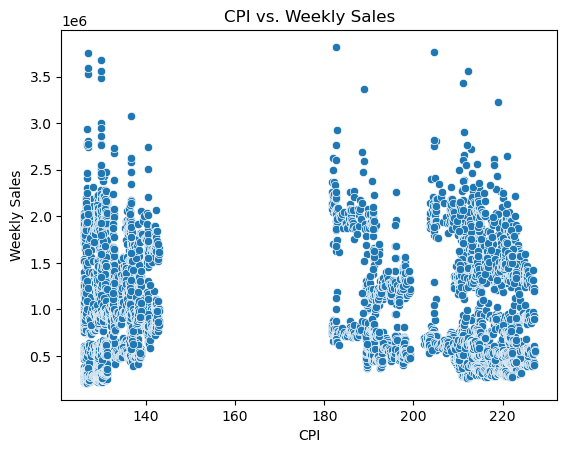

In [36]:
sns.scatterplot(data=df, x='CPI', y='Weekly_Sales')
plt.title('CPI vs. Weekly Sales')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.show()


In [38]:
correlation = df['CPI'].corr(df['Weekly_Sales'])
print('Correlation coefficient:', correlation)


Correlation coefficient: -0.07263416204017631


In [39]:
cpi_bins = pd.cut(df['CPI'], bins=5)  # Divide CPI into 5 bins
average_sales_by_cpi = df.groupby(cpi_bins)['Weekly_Sales'].mean()
print(average_sales_by_cpi)


CPI
(125.963, 146.298]    1.082953e+06
(146.298, 166.532]             NaN
(166.532, 186.765]    1.441698e+06
(186.765, 206.999]    9.962283e+05
(206.999, 227.233]    9.868206e+05
Name: Weekly_Sales, dtype: float64


### Does the fuel price have any impact on weekly sales? Are there any notable trends or patterns?

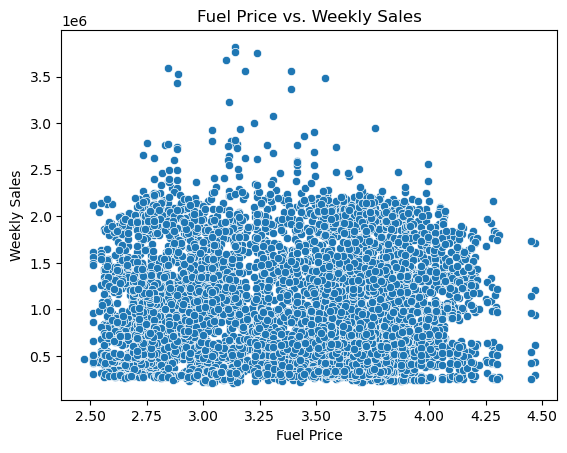

In [42]:
sns.scatterplot(data=df, x='Fuel_Price', y='Weekly_Sales')
plt.title('Fuel Price vs. Weekly Sales')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.show()


In [44]:
correlation = df['Fuel_Price'].corr(df['Weekly_Sales'])
print('Correlation coefficient:', correlation)


Correlation coefficient: 0.009463786314475123


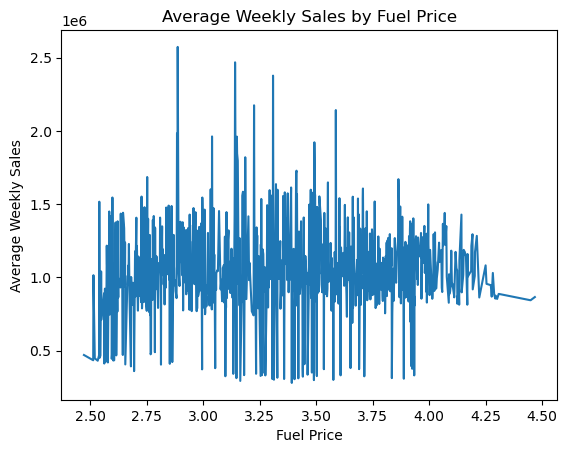

In [45]:
average_sales_by_fuel_price = df.groupby('Fuel_Price')['Weekly_Sales'].mean()
average_sales_by_fuel_price.plot()
plt.title('Average Weekly Sales by Fuel Price')
plt.xlabel('Fuel Price')
plt.ylabel('Average Weekly Sales')
plt.show()


### How do sales vary during holidays compared to regular days? Are there any specific holidays that result in higher sales?

In [51]:
holidays = df['Holiday_Flag'].unique()
holidays

array([0, 1], dtype=int64)

In [52]:
average_sales_by_holiday = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()
average_sales_by_holiday


Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

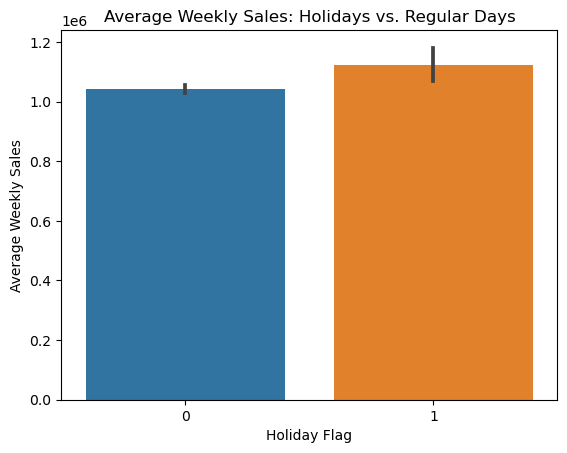

In [50]:
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.title('Average Weekly Sales: Holidays vs. Regular Days')
plt.xlabel('Holiday Flag')
plt.ylabel('Average Weekly Sales')
plt.show()


### Is there any relationship between the unemployment rate and weekly sales? Does higher or lower unemployment affect sales?

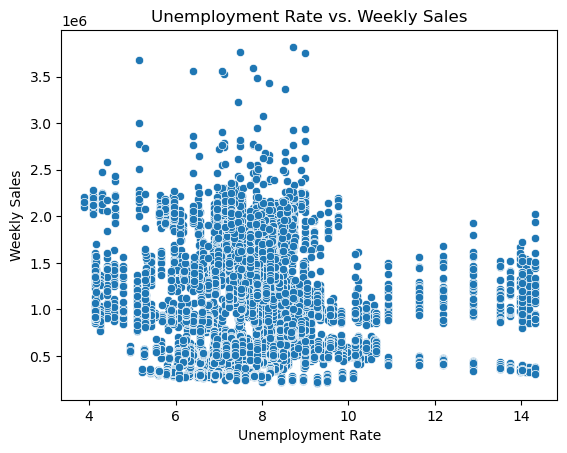

In [54]:
sns.scatterplot(data=df, x='Unemployment', y='Weekly_Sales')
plt.title('Unemployment Rate vs. Weekly Sales')
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.show()


In [57]:
correlation = df['Unemployment'].corr(df['Weekly_Sales'])
correlation


-0.10617608965795419

In [59]:
unemployment_bins = pd.cut(df['Unemployment'], bins=5)  # Divide unemployment rate into 5 bins
average_sales_by_unemployment = df.groupby(unemployment_bins)['Weekly_Sales'].mean()
average_sales_by_unemployment


Unemployment
(3.869, 5.966]      1.180603e+06
(5.966, 8.053]      1.068919e+06
(8.053, 10.139]     1.034817e+06
(10.139, 12.226]    8.039174e+05
(12.226, 14.313]    9.047190e+05
Name: Weekly_Sales, dtype: float64

In [60]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,WeekDay
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,Saturday
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,Wednesday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,Thursday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,Thursday
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,28,Thursday
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,10,Wednesday
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,10,Sunday
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,19,Thursday


### Which months or seasons have the highest sales? Are there any specific patterns or trends?

In [61]:

df['Season'] = (df['Month'] % 12 + 3) // 3


In [63]:
sales_by_month = df.groupby('Month')['Weekly_Sales'].sum()
sales_by_season = df.groupby('Season')['Weekly_Sales'].sum()


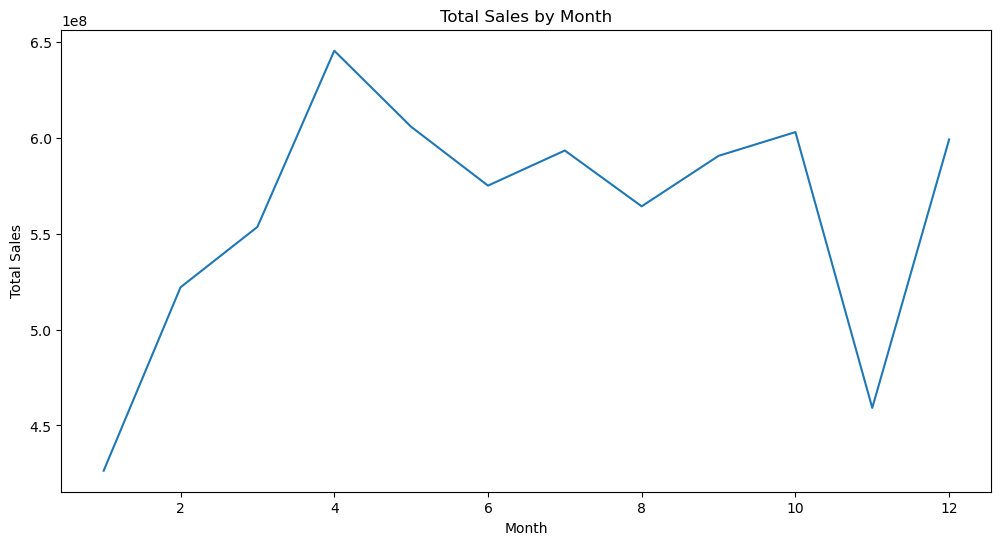

In [64]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=sales_by_month.index, y=sales_by_month.values)
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


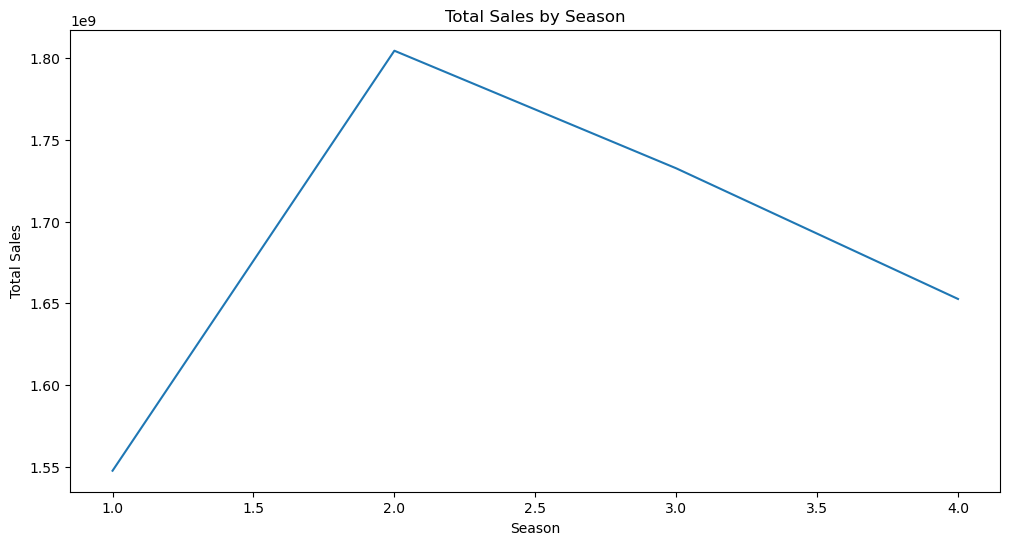

In [65]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=sales_by_season.index, y=sales_by_season.values)
plt.title('Total Sales by Season')
plt.xlabel('Season')
plt.ylabel('Total Sales')
plt.show()

### How do sales vary across weekdays? Are there any weekdays that consistently have higher or lower sales?

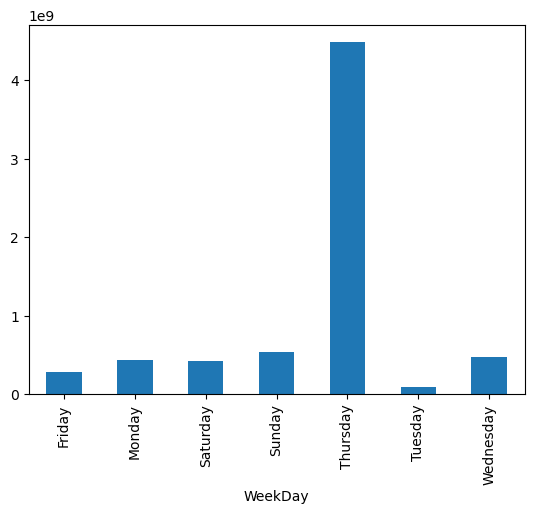

In [73]:
sales_by_weekday = df.groupby('WeekDay')['Weekly_Sales'].sum()
sales_by_weekday.plot.bar();

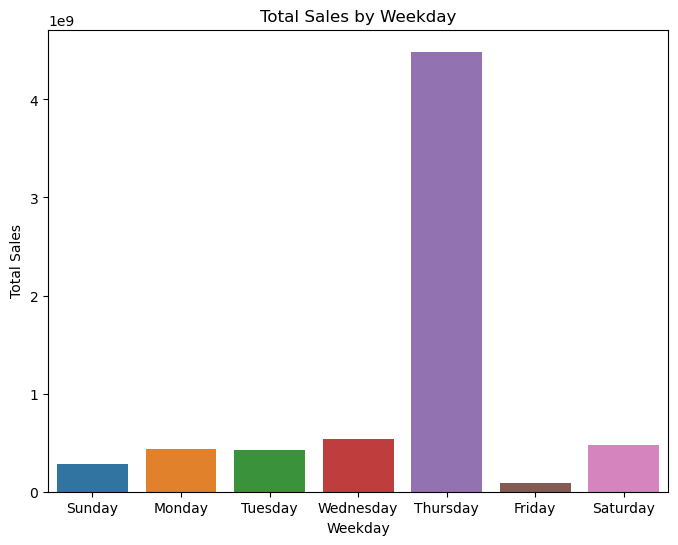

In [68]:
weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.figure(figsize=(8, 6))
sns.barplot(x=weekdays, y=sales_by_weekday.values)
plt.title('Total Sales by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Sales')
plt.show()


### How have weekly sales changed over the years? Are there any significant changes or trends?

In [69]:
sales_by_year = df.groupby('Year')['Weekly_Sales'].sum()


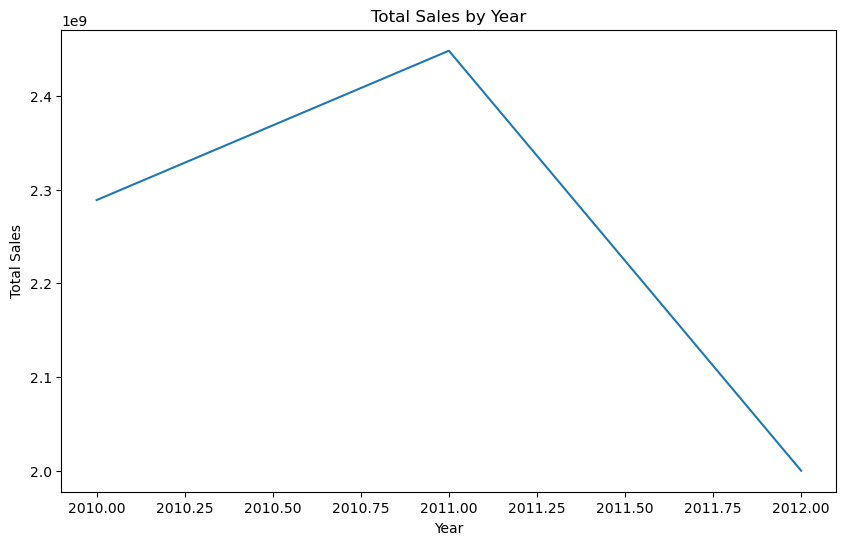

In [70]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=sales_by_year.index, y=sales_by_year.values)
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()


### How do sales differ between holidays and regular days? Are there specific holidays that result in higher sales?

In [71]:
sales_holidays = df[df['Holiday_Flag'] == 1]['Weekly_Sales'].sum()
sales_regular_days = df[df['Holiday_Flag'] == 0]['Weekly_Sales'].sum()


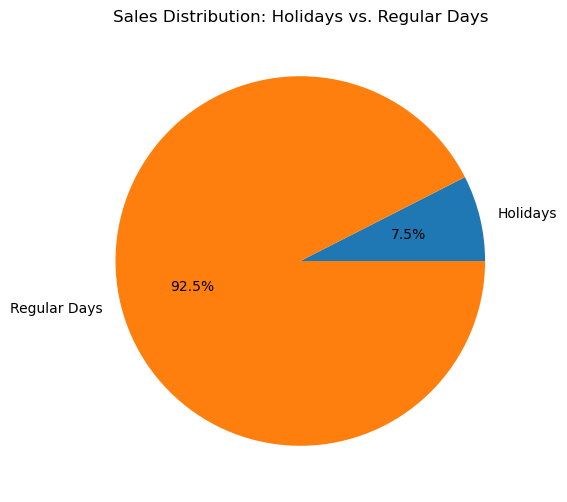

In [72]:
sales_data = [sales_holidays, sales_regular_days]
sales_labels = ['Holidays', 'Regular Days']
plt.figure(figsize=(6, 6))
plt.pie(sales_data, labels=sales_labels, autopct='%1.1f%%')
plt.title('Sales Distribution: Holidays vs. Regular Days')
plt.show()
